# **Dataset & Description**



[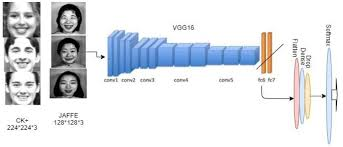](http://)


The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.








[Dataset link ](https://www.kaggle.com/msambare/fer2013)

# Import necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sn
# import skimage.io
# import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model, Sequential
# from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [21]:
train_dataset  = train_datagen.flow_from_directory(directory = 'Dataset/train',
                                                   target_size = (48,48),
                                                   color_mode = "grayscale",
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 22968 images belonging to 7 classes.


In [22]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'Dataset/train',
                                                  target_size = (48,48),
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 5741 images belonging to 7 classes.


In [23]:
test_dataset = test_datagen.flow_from_directory(directory = 'Dataset/test',
                                                  target_size = (48,48),
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 7178 images belonging to 7 classes.


# Building the Classical CNN Model

In [24]:
no_of_classes=7

model=Sequential()

input_shape=(48,48,1)
model = Sequential()
#layer1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))
#layer2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))
#layer3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))
#layer4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


#opt = Adam(learning_rate = 0.0001)
#model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
# Model Summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 21, 21, 64)      

In [26]:
lrd = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


mcp = ModelCheckpoint('Models/cb_classic_cnn.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True #restoring the best model
                          )

In [27]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/100
359/359 [==============================] - 88s 231ms/step - loss: 2.1299 - accuracy: 0.2071 - val_loss: 2.2276 - val_accuracy: 0.2513 - lr: 0.0010
Epoch 2/100
359/359 [==============================] - 48s 133ms/step - loss: 1.8923 - accuracy: 0.2283 - val_loss: 1.7933 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 3/100
359/359 [==============================] - 82s 229ms/step - loss: 1.8339 - accuracy: 0.2507 - val_loss: 1.7479 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 4/100
359/359 [==============================] - 120s 336ms/step - loss: 1.7780 - accuracy: 0.2741 - val_loss: 1.9962 - val_accuracy: 0.2613 - lr: 0.0010
Epoch 5/100
359/359 [==============================] - 170s 474ms/step - loss: 1.7221 - accuracy: 0.3084 - val_loss: 2.5076 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 6/100
359/359 [==============================] - ETA: 0s - loss: 1.6642 - accuracy: 0.3379
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Restoring model weights from 

In [29]:
model.save('Models/enhanced_cnn_v1.h5')

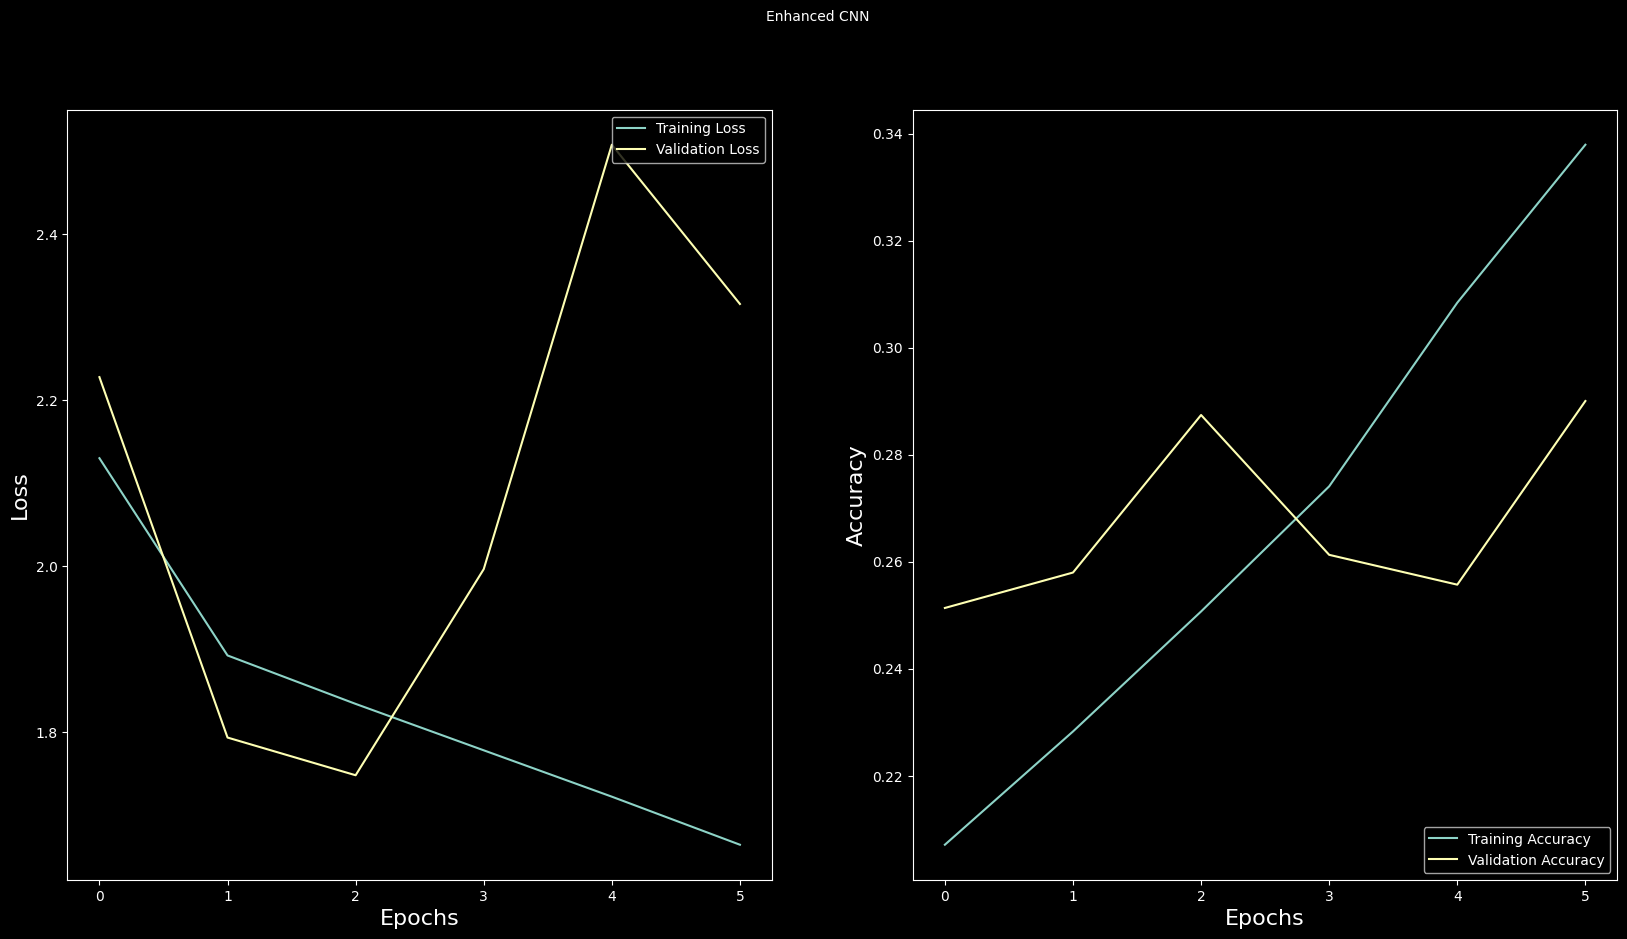

In [30]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Enhanced CNN', fontsize=10)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
from tensorflow.keras.models import load_model

model = load_model('Models/enhanced_cnn_v1.h5', compile = True)

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 21, 21, 64)      

# Test a model

In [33]:
results = model.evaluate(test_dataset)
results

113/113 [==============================] - 11s 84ms/step - loss: 1.7372 - accuracy: 0.3018


[1.7372220754623413, 0.3017553687095642]

# Create Confusion Matrix

In [34]:
# Finding prediction for the test dataset
predictions = model.predict(test_dataset)

# Categorizing test dataset based on predictions
test_prediction = []
for i in range(test_dataset.samples):
    idx = np.argmax(predictions[i])
    test_prediction.append(idx)

113/113 [==============================] - 10s 82ms/step


In [35]:
# Defining labels of Confusion Matrix
emotions = test_dataset.class_indices

# Creating Confusion matrix
res = tf.math.confusion_matrix(test_prediction, test_dataset.classes).numpy()
cm = pd.DataFrame(res, index=emotions, columns=emotions)
cm

,angry,disgust,fear,happy,neutral,sad,surprise
angry,11,2,20,23,26,21,16
disgust,0,0,0,0,0,0,0
fear,145,12,139,267,183,194,132
happy,462,50,461,821,568,575,386
neutral,57,7,64,107,68,82,52
sad,162,23,171,301,211,202,118
surprise,121,17,169,255,177,173,127
